## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = merged_df.value_counts("Mouse ID")
print(len(number_of_mice))

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Looking at all duplicated mice IDs -- this will show duplicate mice and mice that have muliple timepoints
duplicate_mice = number_of_mice[number_of_mice > 1]
print(len(duplicate_mice))

# Looking at duplicated mice ID AND timepoint - this will show true duplicates based on timepoint and ID
dup_ID_Timepoint = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(len(dup_ID_Timepoint))
dup_ID_Timepoint

237
10


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_alldata = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
duplicate_mouse_alldata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = merged_df.drop(merged_df['Mouse ID'].loc[merged_df['Mouse ID'] == "g989"].index)
cleaned_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count = cleaned_df.value_counts("Mouse ID")
print(len(cleaned_mice_count))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# group data by drug regimen
by_drug = cleaned_df.groupby(['Drug Regimen'])

# Find the mean of tumor volume
mean_tumorvol = by_drug['Tumor Volume (mm3)'].mean()

# Find median of tumor volume
median_tumorvol = by_drug['Tumor Volume (mm3)'].median()

# Find variance of tumor volume
var_tumorvol = by_drug['Tumor Volume (mm3)'].var()

# Find standard deviation of tumor volume = 
std_tumorvol = by_drug['Tumor Volume (mm3)'].std()

# Find the SEM of tumor volume
sem_tumorvol = by_drug['Tumor Volume (mm3)'].sem()

# Assemble into dataframe
summary_stats = pd.DataFrame({"Mean Tumor Vol (mm3)": round(mean_tumorvol, 3), 
                            "Median Tumor Vol (mm3)": round(median_tumorvol, 3),
                            "Variance": round(var_tumorvol, 3),
                             "Standard Deviation": round(std_tumorvol, 3),
                             "SEM": round(sem_tumorvol, 3)})
summary_stats



,Mean Tumor Vol (mm3),Median Tumor Vol (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = by_drug.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
summary_stats_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

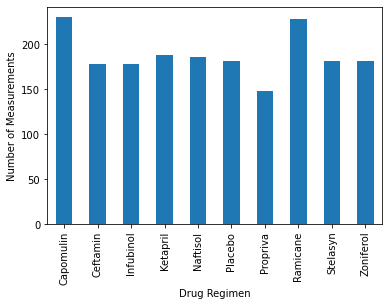

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot_counts = by_drug['Mouse ID'].count()
bar_plot_counts.plot(kind = 'bar')
plt.ylabel("Number of Measurements")
plt.show()

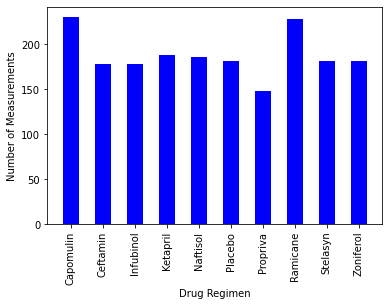

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# import numpy
import numpy as np

# create labels
drug_labels = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

# create values in list from counts of drug use per mouse ID df created above
counts = []

for row in bar_plot_counts:
    counts.append(row)

# Make bar chart
plt.bar(drug_labels, counts, color='blue', width = 0.5)

#rotate the drug names so they do not overlap
plt.xticks(rotation = 90)

# add labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

plt.show()


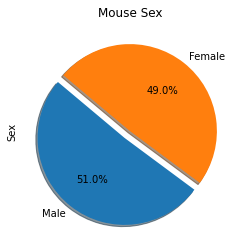

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# make df based on gender counts
pie_counts_gender = cleaned_df['Sex'].value_counts()
pie_counts_gender

explode = (0.1, 0)
# make pie chart
pie_counts_gender.plot.pie(subplots=True, startangle=140, explode=explode, shadow=True, autopct="%1.1f%%")
plt.title("Mouse Sex")
plt.show()


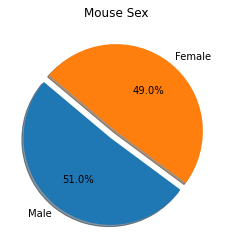

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# create labels
sex_labels = ["Male", "Female"]

# create values for male / female
sex_list = (cleaned_df['Sex'].value_counts()).tolist()
sex_list

plt.pie(sex_list, labels=sex_labels, startangle=140, explode=explode, shadow=True, autopct="%1.1f%%")
plt.title("Mouse Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Make new df with the drugs of interest
desired_treatments = cleaned_df[cleaned_df["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
desired_treatments

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_perdrug = desired_treatments.groupby('Mouse ID').max()["Timepoint"]
max_timepoint_perdrug = pd.DataFrame(max_timepoint_perdrug)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint 
merged_desired_treatment_df = pd.merge(desired_treatments, max_timepoint_perdrug, on=['Mouse ID', 'Timepoint'], how='inner')
merged_desired_treatment_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# I'm assuming we are supposed to do this is for each drug based on the readme file...

# Calculate IQR and upper and lower bounds for outliers for Capomulin
cap_df = merged_desired_treatment_df.loc[merged_desired_treatment_df["Drug Regimen"] == 'Capomulin', :]
quartiles_cap = cap_df["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap - lowerq_cap

low_end_cap = lowerq_cap - (1.5*iqr_cap)
upper_end_cap = upperq_cap +(1.5*iqr_cap)

print(f'Summary for Capomulin')
print(f'The IQR is: {iqr_cap}')
print(f'The lower bound is: {low_end_cap}')
print(f'The upper bound is: {upper_end_cap}')
print(f'Any points outside the upper and lower bounds are outliers')

# Calculate IQR and upper and lower bounds for outliers for Ramicane
ram_df = merged_desired_treatment_df.loc[merged_desired_treatment_df["Drug Regimen"] == 'Ramicane', :]
quartiles_ram = ram_df["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram - lowerq_ram

low_end_ram = lowerq_ram - (1.5*iqr_ram)
upper_end_ram = upperq_ram +(1.5*iqr_ram)

print(f'Summary for Ramicane')
print(f'The IQR is: {iqr_ram}')
print(f'The lower bound is: {low_end_ram}')
print(f'The upper bound is: {upper_end_ram}')
print(f'Any points outside the upper and lower bounds are outliers')

# Calculate IQR and upper and lower bounds for outliers for Infubinol
inf_df = merged_desired_treatment_df.loc[merged_desired_treatment_df["Drug Regimen"] == 'Infubinol', :]
quartiles_inf = inf_df["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf - lowerq_inf

low_end_inf = lowerq_inf - (1.5*iqr_inf)
upper_end_inf = upperq_inf +(1.5*iqr_inf)

print(f'Summary for Infubinol')
print(f'The IQR is: {iqr_inf}')
print(f'The lower bound is: {low_end_inf}')
print(f'The upper bound is: {upper_end_inf}')
print(f'Any points outside the upper and lower bounds are outliers')

# Calculate IQR and upper and lower bounds for outliers for Ceftamin
cef_df = merged_desired_treatment_df.loc[merged_desired_treatment_df["Drug Regimen"] == 'Ceftamin', :]
quartiles_cef = cef_df["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef - lowerq_cef

low_end_cef = lowerq_cef - (1.5*iqr_cef)
upper_end_cef = upperq_cef +(1.5*iqr_cef)

print(f'Summary for Ceftamin')
print(f'The IQR is: {iqr_cef}')
print(f'The lower bound is: {low_end_cef}')
print(f'The upper bound is: {upper_end_cef}')
print(f'Any points outside the upper and lower bounds are outliers')

# Calculate IQR and upper and lower bounds for outliers for Capomulin
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


    #I really have no idea what this means or what I should do here. The instructions are not very clear and all the IQR and upper and lower bounds have been calculated.
    

Summary for Capomulin
The IQR is: 7.781863460000004
The lower bound is: 20.70456164999999
The upper bound is: 51.83201549
Any points outside the upper and lower bounds are outliers
Summary for Ramicane
The IQR is: 9.098536719999998
The lower bound is: 17.912664470000003
The upper bound is: 54.30681135
Any points outside the upper and lower bounds are outliers
Summary for Infubinol
The IQR is: 11.477135160000003
The lower bound is: 36.83290494999999
The upper bound is: 82.74144559000001
Any points outside the upper and lower bounds are outliers
Summary for Ceftamin
The IQR is: 15.577752179999997
The lower bound is: 25.355449580000002
The upper bound is: 87.66645829999999
Any points outside the upper and lower bounds are outliers


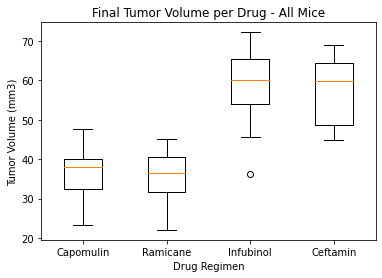

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Set data points
tumor_vol_data_per_drug_list = [cap_df['Tumor Volume (mm3)'], ram_df['Tumor Volume (mm3)'], inf_df['Tumor Volume (mm3)'], cef_df['Tumor Volume (mm3)']]

# X labels
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Make plot
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data_per_drug_list, labels=drug_list)
ax1.set_title("Final Tumor Volume per Drug - All Mice")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

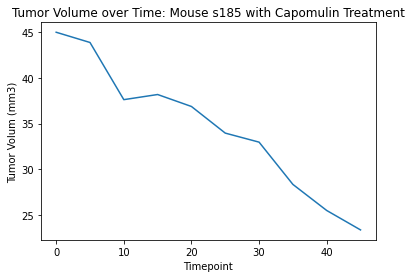

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Find a mouse treated with Capomulin
cap_df.head() # I will use Mouse ID s185

# create dataframe for this mouse's data only
Mouse_s185_df = cleaned_df.loc[cleaned_df['Mouse ID'] == "s185", :]
Mouse_s185_df

# Set axis
x_axis = Mouse_s185_df['Timepoint']
y_axis = Mouse_s185_df['Tumor Volume (mm3)']

# Make the plot
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volum (mm3)")
plt.title("Tumor Volume over Time: Mouse s185 with Capomulin Treatment")
plt.show()

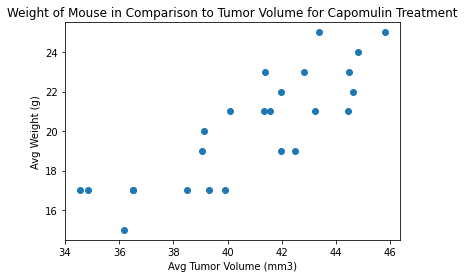

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Make new df with only capomulin and all timepoitns
cap_alldata = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
cap_alldata

# Find average tumor volume per mouse
mean_tumorvol_cap = cap_alldata.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Find average weight per mouse
mean_weight_cap = cap_alldata.groupby('Mouse ID')['Weight (g)'].mean()

# Make the scatter plot
plt.scatter(mean_tumorvol_cap, mean_weight_cap)
plt.xlabel('Avg Tumor Volume (mm3)')
plt.ylabel('Avg Weight (g)')
plt.title('Weight of Mouse in Comparison to Tumor Volume for Capomulin Treatment')
plt.show()


## Correlation and Regression

The R-squared value for correlation is: 0.842
y = 0.743x + -10.149


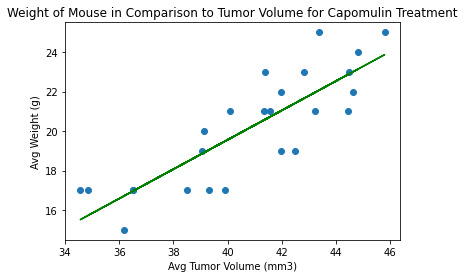

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Import linregress because I was having issues with this not working
from scipy.stats import linregress

# Set x and y variables as a list 
x_values = []

for row in mean_tumorvol_cap:
    x_values.append(row)

y_values = []

for row in mean_weight_cap:
    y_values.append(row)

# Use the pearson r to calculate r value
correlation = round((st.pearsonr(x_values,y_values))[0],3)
print(f"The R-squared value for correlation is: {correlation}")

# do the linear regrerssion
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = mean_tumorvol_cap * slope + intercept

# find the equation of the line
line_equation = f"y = {round(slope, 3)}x + {round(intercept, 3)}"
print(line_equation)

plt.scatter(mean_tumorvol_cap, mean_weight_cap)
plt.xlabel('Avg Tumor Volume (mm3)')
plt.ylabel('Avg Weight (g)')
plt.title('Weight of Mouse in Comparison to Tumor Volume for Capomulin Treatment')

#Add regression line to previous chart
plt.plot(x_values, regress_values, color='green')

plt.show()
